In [1]:
import os
import math
import shutil
import numpy as np
from PIL import Image
from utils.draw import draw_xy
import matplotlib.pyplot as plt

In [2]:
def generate(count):
    X = np.random.randint(0, high=255, size=(count, 9))
    a = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0], 
                  [0, 0, 0, 1, 1, 1, 0, 0, 0], 
                  [0, 0, 0, 0, 0, 0, 1, 1, 1]])

    Y = np.eye(3)[np.argmax(X.dot(a.T), axis=1)]
    return X, Y

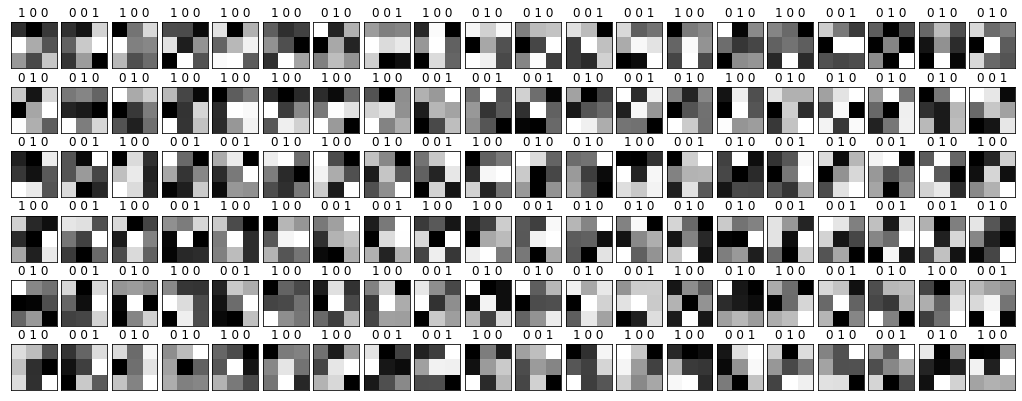

In [3]:
draw_xy(*generate(120))

In [4]:
def train(n=512, epochs=56000, lr = 1e-3):
    # weight vector
    W = np.random.randn(9, 3)
    b = np.random.randn(1, 3)

    # training loop
    for t in range(epochs):
        # get new training data
        X, y = generate(n)
        X = X / 255

        # model function
        h = X.dot(W) + b

        # compute loss
        loss = np.square(h - y).mean()

        # compute accuracy
        acc = (np.argmax(h, axis=1) == np.argmax(y, axis=1)).mean()

        if t % 5000 == 0:
            print('l: {:>8f}, a {:>.4f} (e {})'.format(loss, acc, t))

        # grad + update
        grad_w = 2 * X.T.dot(h - y) / n
        W -= lr * grad_w

        grad_b = 2 * np.sum(h - y, axis=0) / n
        b -= lr * grad_b

    return W, b

In [5]:
W, b = train()
print('\nFinal W = \n\n{}\n\nFinal b = \n\n{}'.format(W, b))

l: 2.856105, a 0.2734 (e 0)
l: 0.203259, a 0.5996 (e 5000)
l: 0.125143, a 0.8164 (e 10000)
l: 0.109183, a 0.8926 (e 15000)
l: 0.104883, a 0.9004 (e 20000)
l: 0.099931, a 0.9375 (e 25000)
l: 0.104011, a 0.9512 (e 30000)
l: 0.107277, a 0.9570 (e 35000)
l: 0.100308, a 0.9668 (e 40000)
l: 0.104737, a 0.9863 (e 45000)
l: 0.107053, a 0.9766 (e 50000)
l: 0.099793, a 0.9961 (e 55000)

Final W = 

[[ 0.57775157 -0.27516143 -0.29983488]
 [ 0.57768692 -0.27589319 -0.29935118]
 [ 0.57811469 -0.2764427  -0.29911445]
 [-0.27712936  0.57835142 -0.29856699]
 [-0.27640057  0.5782363  -0.29916655]
 [-0.27706883  0.57939636 -0.29960357]
 [-0.27661276 -0.27371918  0.55306812]
 [-0.27658511 -0.27363858  0.55294286]
 [-0.27656491 -0.2740988   0.55327718]]

Final b = 

[[0.29612778 0.28854414 0.40312817]]


In [6]:
npix = np.array([[255, 143, 255, 255, 187, 93, 5, 5, 5]])
a = npix.dot(W) + b
d = ['top', 'middle', 'bottom']
print(d[np.argmax(a)])

top
